In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Palladium.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

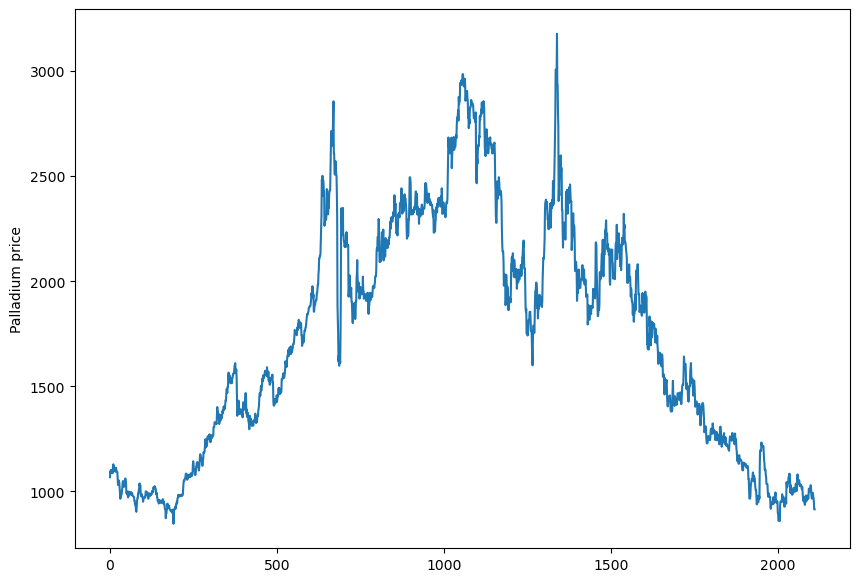

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Palladium price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  1.0691129663982613
c:  1069.4800742645693


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,2648.559926
1,2649.629039
2,2650.698152
3,2651.767265
4,2652.836378
...,...
628,3319.962869
629,3321.031981
630,3322.101094
631,3323.170207


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 131.75606335216403
Mean Squared Error (MSE): 2829033.499870932
Root Mean Squared Error (RMSE): 1681.9730972494572


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[3325.30843336 3326.37754633 3327.4466593  3328.51577226 3329.58488523
 3330.6539982  3331.72311116 3332.79222413 3333.8613371  3334.93045006
 3335.99956303 3337.068676   3338.13778896 3339.20690193 3340.27601489
 3341.34512786 3342.41424083 3343.48335379 3344.55246676 3345.62157973
 3346.69069269 3347.75980566 3348.82891863 3349.89803159 3350.96714456
 3352.03625752 3353.10537049 3354.17448346 3355.24359642 3356.31270939
 3357.38182236 3358.45093532 3359.52004829 3360.58916126 3361.65827422
 3362.72738719 3363.79650016 3364.86561312 3365.93472609 3367.00383905
 3368.07295202 3369.14206499 3370.21117795 3371.28029092 3372.34940389
 3373.41851685 3374.48762982 3375.55674279 3376.62585575 3377.69496872
 3378.76408168 3379.83319465 3380.90230762 3381.97142058 3383.04053355
 3384.10964652 3385.17875948 3386.24787245 3387.31698542 3388.38609838
 3389.45521135 3390.52432432 3391.59343728 3392.66255025 3393.73166321
 3394.80077618 3395.86988915 3

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

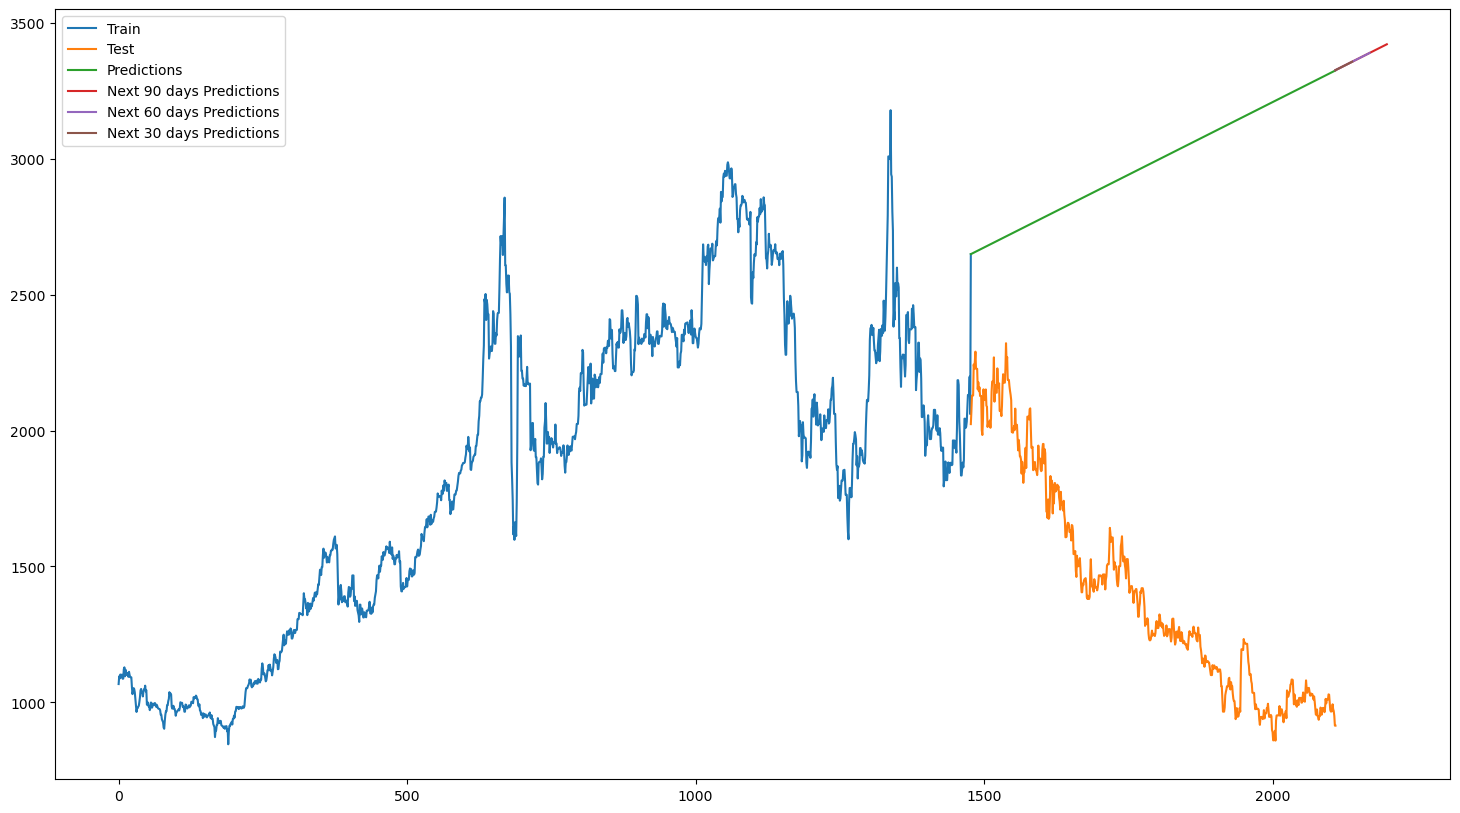

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()